In [ ]:
 !pip install opencv-python scikit-image Pillow

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload the image file


Saving Cat.jpg to Cat (2).jpg


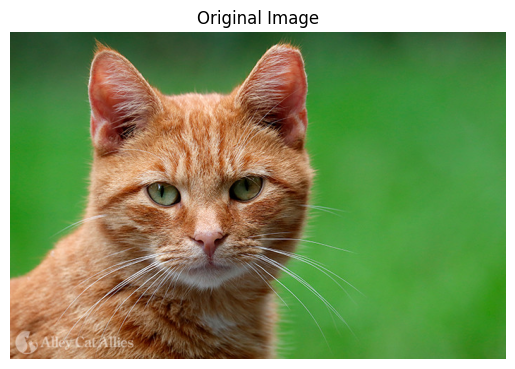

Image saved as output_image.jpg


In [ ]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Read the uploaded image using OpenCV
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

# Convert BGR to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Save the image
cv2.imwrite('output_image.jpg', image)
print("Image saved as output_image.jpg")


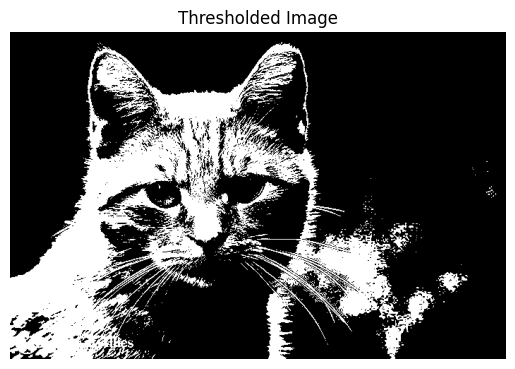

In [ ]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply simple thresholding
_, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Display the thresholded image
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()


TO Do:
Explore different local and global thresholding methods

In [ ]:
!pip install --upgrade scikit-image


In [ ]:
!pip install --upgrade scikit-image # Ensure scikit-image is upgraded
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray

# Convert the image to grayscale
image_gray = rgb2gray(image_rgb)
image_gray = (image_gray * 255).astype(np.uint8)

# Compute the GLCM matrix
glcm = graycomatrix(image_gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True) # Use graycomatrix instead of greycomatrix

# Extract texture features
contrast = graycoprops(glcm, 'contrast')[0, 0] # Use graycoprops instead of greycoprops
dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
energy = graycoprops(glcm, 'energy')[0, 0]
correlation = graycoprops(glcm, 'correlation')[0, 0]

# Print the extracted features
print(f'Contrast: {contrast}')
print(f'Dissimilarity: {dissimilarity}')
print(f'Homogeneity: {homogeneity}')
print(f'Energy: {energy}')
print(f'Correlation: {correlation}')

Contrast: 188.06112741749885
Dissimilarity: 6.299151452499182
Homogeneity: 0.424182271970508
Energy: 0.04514661823974683
Correlation: 0.9271665527444879


Explore Texture based Featres

## For text Extraction

In [ ]:
from google.colab import files
uploaded_new = files.upload()  # Upload the image file


Saving Extract.png to Extract (2).png


In [ ]:
# Install tesseract and pytesseract
!apt-get install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:

import pytesseract

# Read the uploaded image using OpenCV
image_path_new = list(uploaded_new.keys())[0]
image_new = cv2.imread(image_path_new)



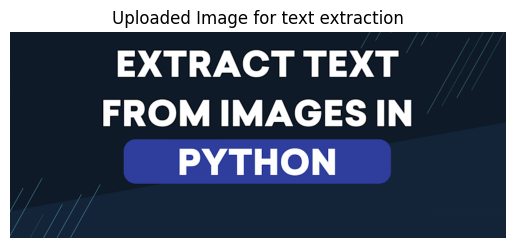

In [ ]:
image_rgb_new = cv2.cvtColor(image_new, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb_new)
plt.title('Uploaded Image for text extraction')
plt.axis('off')
plt.show()

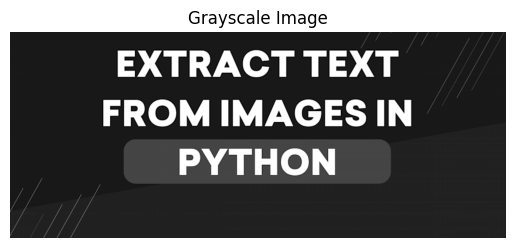

In [ ]:
# Convert to grayscale
gray_image_new = cv2.cvtColor(image_new, cv2.COLOR_BGR2GRAY)

# Display the thresholded image
plt.imshow(gray_image_new, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()




In [ ]:
# Apply a binary threshold to clean up the image for better OCR accuracy
_, processed_image = cv2.threshold(gray_image_new, 127, 255, cv2.THRESH_BINARY)

# Use pytesseract on the processed image
text_processed = pytesseract.image_to_string(processed_image)

# Print the extracted text from the processed image
print("Extracted Text from Processed Image:")
print(text_processed)

Extracted Text from Processed Image:
EXTRACT TEXT
FROM IMAGES IN
PYTHON

